<a href="https://colab.research.google.com/github/saurabhsuman2406/bhoomija/blob/master/A_study_on_existing_Indian_Agriculture_Information_System_at_Google_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq google-play-scraper

In [2]:
!pip install -qq -U watermark

In [3]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

pandas             : 1.1.5
matplotlib         : 3.2.2
seaborn            : 0.11.1
google_play_scraper: 0.2.1



In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [5]:
app_packages = [
  'com.globalagricentral',
  'com.criyagen',
  'com.IFFCOKisan',
  'com.mcc.agrilearner',
  'com.peat.GartenBank',
  'nithra.tamil.vivasayam.agriculture.market',
  'com.ulink.agrostar',
  'com.iqra.agromedix',
  'com.BigHaat',
  'com.kisanportalapp',
  'com.mandibhav.app',
  'coop.nddb.pashuposhan',
  'com.criyagen',
  'com.techsters.agridoctor',
  'com.firstfarmer.av',
  'com.aaria.farmer',
  'com.krishi.krishi',
  'wotr.farmprecise',
  'com.agribegri',
  'com.agribolo',
  'com.krishi.krishi',
  'net.mobile.icar.kisaan'
  
]


In [6]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='in')
  del info['comments']
  app_infos.append(info)

100%|██████████| 22/22 [00:04<00:00,  5.13it/s]


In [7]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "4.4",
  "androidVersionText": "4.4 and up",
  "appId": "com.globalagricentral",
  "containsAds": false,
  "contentRating": "Rated for 3+",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "AgriCentral is a technology based agriculture app specially made for Indian farmers to help them make critical decisions in their farming business to increase profitability. It harnesses state of the art technologies like Global positioning, satellite imagery, big data analytics, machine learning and image analytics to usher the farmers into the era of digital farming.\r\n\r\nAbsolutely free of cost, this new and enhanced app has the following key features:\r\n\r\n\u2022 Farm Voice: It\u2019s a place to interact with progressive farmers all across the country and Agri experts for resolution of your queries. You can ask questions about your crop, learn about new farming techniques, showcase your success stories and discuss on any t

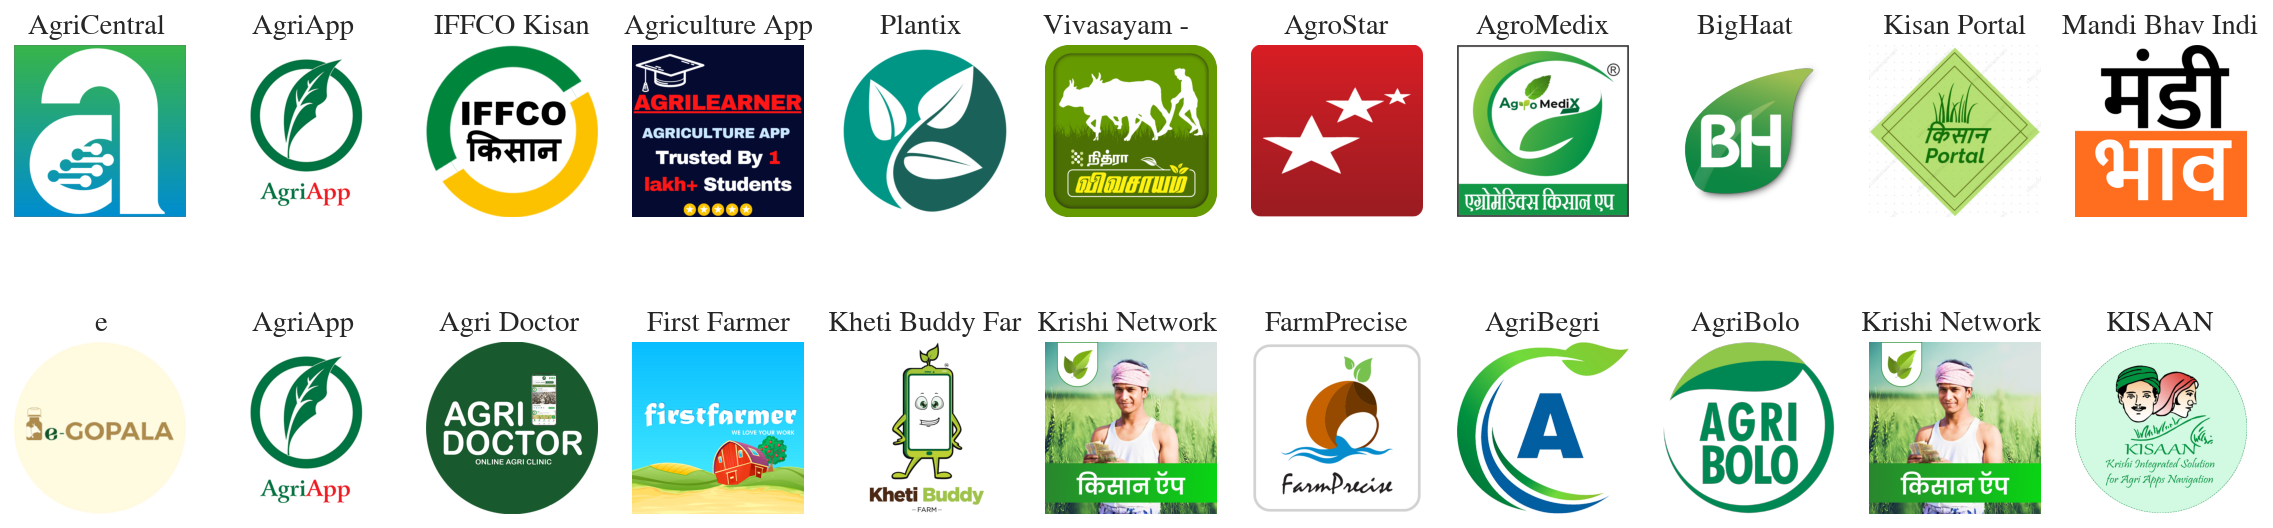

In [9]:
import warnings
import matplotlib
import matplotlib.pyplot as plt
# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:15]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(20, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')


#ignore by message
#warnings.filterwarnings("ignore", message="Glyph 2997 missing from current font")
warnings.filterwarnings("ignore")

In [10]:
app_packages = [
  'com.globalagricentral',
  'com.criyagen',
  'com.IFFCOKisan',
  'com.mcc.agrilearner',
  'com.peat.GartenBank',
  'nithra.tamil.vivasayam.agriculture.market',
  'com.ulink.agrostar',
  'com.iqra.agromedix',
  'com.BigHaat',
  'com.kisanportalapp',
  'com.mandibhav.app',
  'coop.nddb.pashuposhan',
  'com.criyagen',
  'in.gov.enam',
  'com.techsters.agridoctor',
  'com.firstfarmer.av',
  'com.aaria.farmer',
  'com.krishi.krishi',
  'wotr.farmprecise',
  'com.agribegri',
  'com.agribolo',
  'com.krishi.krishi',
  'com.farmer.khetipoint',
  'com.wolkus.fasalapp',
  'com.kisannetwork',
  'com.agrimedia',
  'com.globalfarm.marketyard',
  'app.intspvt.com.farmer',
  'com.yara.farmhealth.production',
  'agstack.gramophone',
  'com.app.naagali',
  'in.gov.enam',
  'net.mobile.icar.kisaan'
  
]


In [11]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='in')
  del info['comments']
  app_infos.append(info)

100%|██████████| 33/33 [00:06<00:00,  5.48it/s]


In [12]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)


In [13]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 33/33 [01:03<00:00,  1.91s/it]


In [14]:
print_json(app_reviews[0])

{
  "appId": "com.globalagricentral",
  "at": "2021-04-06 07:50:32",
  "content": "Why app showing demo video again again it must show up to date rate daily and for all selected crop in one column. View design is not user friendly",
  "repliedAt": "2021-04-07 07:04:30",
  "replyContent": "Hi Ishwar, thank you for your feedback & we regret the inconvenience caused. Please share your suggestions at askus@globalagricentral.com so that we can address them better. We will look forward to your email.",
  "reviewCreatedVersion": "4.0.1",
  "reviewId": "gp:AOqpTOGkfEI47sn3G0kpnAtqa-_ivDKGhFpMkzCmlgYhBC5GtIksAEa_o_Urh9twmhnCtb710r5-JqrWrKTL9RY",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 27,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14Gi_Auw92ifQBlhW-_LW5FVhrDnZfTxUTVoZWg3YSw",
  "userName": "Ishwar Lidhure"
}



In [15]:
len(app_reviews)

16473

In [16]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGkfEI47sn3G0kpnAtqa-_ivDKGhFpMkzCmlgY...,Ishwar Lidhure,https://play-lh.googleusercontent.com/a-/AOh14...,Why app showing demo video again again it must...,1,27,4.0.1,2021-04-06 07:50:32,"Hi Ishwar, thank you for your feedback & we re...",2021-04-07 07:04:30,most_relevant,com.globalagricentral
1,gp:AOqpTOHun5OJs2i8hF2BPj30tPZ-RIYR1CdEMZIzQ43...,Evil Thakur,https://play-lh.googleusercontent.com/a-/AOh14...,"App is good , actully app concept i say. All i...",1,18,4.0.1,2021-04-06 14:46:21,"Hi Evil, thank you for the feedback. We are fo...",2021-04-07 05:53:31,most_relevant,com.globalagricentral
2,gp:AOqpTOG7-z2eMG8GNdoxnnBjsvpIl22Saeor56tNBs0...,Bidyut Koner,https://play-lh.googleusercontent.com/a/AATXAJ...,1)Crops list is not enough 2)bengali should be...,1,0,4.0.1,2021-04-16 16:25:01,"Hi Bidyut, we regret the inconveniences caused...",2021-04-19 10:49:49,most_relevant,com.globalagricentral
3,gp:AOqpTOEU-5et8N6SwsW6BsLn17_zWwk-Qf0uye-t8az...,Dcvinayak Rao,https://play-lh.googleusercontent.com/a-/AOh14...,Login OTP SMS not being recieved,1,3,4.0.1,2021-04-05 14:35:41,"Hi Vinayak, we regret the inconvenience caused...",2021-04-06 06:52:45,most_relevant,com.globalagricentral
4,gp:AOqpTOFzh7E7_AX9PkOWZHCJN82v72ODxlRzqTYbHLX...,Manohar Bonu,https://play-lh.googleusercontent.com/a/AATXAJ...,Some crops market prices are not shown in Andh...,1,0,4.0.2,2021-04-17 17:23:47,"Hi Manohar, we regret the inconvenience caused...",2021-04-19 11:55:40,most_relevant,com.globalagricentral
